# PW4-Unsupervised machine learning: Kmeans, Hclustering, DBSCAN

### Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import cluster
import sklearn as sk
from sklearn import datasets
import pandas as pd
from scipy.cluster.hierarchy import linkage
import seaborn as sbn
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

## Part I: Generate the orignam data with label manually and define the metric function (rand index).

### Exercise 1: Generate a synthetic dataset

In [4]:
syn=np.empty([0, 2]);
synLabels=[];
for k in range(4):
    syn = np.concatenate((syn, k*2+np.random.rand(25, 2)), axis=0);
    synLabels = np.concatenate((synLabels, np.ones(25)*k));

display("syn :",syn)
display("syn labels :" , synLabels)

'syn :'

array([[0.35995821, 0.7777936 ],
       [0.74900693, 0.67701496],
       [0.95634685, 0.40149994],
       [0.33157375, 0.50428512],
       [0.00811666, 0.92444664],
       [0.74100894, 0.44028806],
       [0.04384445, 0.74377179],
       [0.97436324, 0.46652484],
       [0.26457994, 0.29071915],
       [0.27234352, 0.07356394],
       [0.33644326, 0.51908052],
       [0.85308357, 0.91135474],
       [0.55928798, 0.66903161],
       [0.65701841, 0.77882879],
       [0.21526727, 0.83440871],
       [0.27498964, 0.32847013],
       [0.44993463, 0.31061862],
       [0.13035113, 0.89003266],
       [0.94997688, 0.77635747],
       [0.48557816, 0.62513863],
       [0.3777515 , 0.62489648],
       [0.03639087, 0.68904757],
       [0.34332443, 0.75749404],
       [0.87208481, 0.56605199],
       [0.10509282, 0.38529506],
       [2.05259519, 2.62632503],
       [2.44932519, 2.58625296],
       [2.19745689, 2.3607396 ],
       [2.7957766 , 2.16715945],
       [2.04260494, 2.97483114],
       [2.

'syn labels :'

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

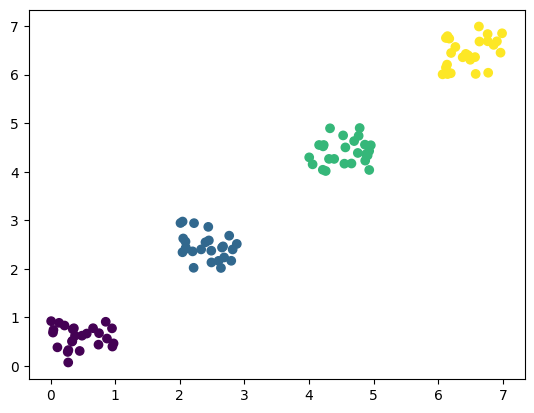

In [5]:
plt.scatter(syn[:, 0], syn[:, 1], c=synLabels);
plt.show();

In [6]:
def randomClustering(syn, k):
    return np.random.randint(0, k, syn.shape[0])
rand = randomClustering(syn, 4)
rand

array([0, 0, 2, 2, 3, 0, 0, 3, 0, 0, 1, 3, 3, 1, 0, 1, 3, 1, 1, 2, 1, 2,
       1, 3, 0, 0, 1, 2, 3, 3, 2, 0, 1, 3, 0, 0, 3, 0, 2, 3, 1, 2, 0, 2,
       1, 2, 0, 0, 1, 1, 0, 3, 2, 0, 0, 2, 1, 1, 3, 1, 2, 0, 0, 1, 0, 2,
       3, 3, 2, 2, 3, 0, 0, 2, 3, 3, 3, 0, 2, 2, 2, 3, 3, 1, 2, 3, 3, 0,
       3, 0, 1, 3, 3, 0, 2, 2, 0, 1, 3, 3])

### Exercise 2: Creat the rand index as the metric to evaluate the performance of clustering.


In [92]:
def rand_index(ref, est):
    num = 0
    if len(ref) != len(est):
        print('arrays must be of the same size')
        error()
    for k in range(len(ref)):
        for l in range(len(ref)-k-1):
            if (ref[k]==ref[k+l+1] and est[k]==est[k+l+1]) or (ref[k]!=ref[k+l+1] and est[k]!=est[k+l+1]) :
                num += 1
    den = len(ref)*(len(ref)-1)/2
    return num/den

In [93]:
ri = rand_index(rand, rand)
print(ri)
ri = rand_index(synLabels, rand)
print(ri)

1.0
0.6272727272727273


In [94]:
ri = np.zeros((100))
for k in range(100):
    ri[k] = rand_index(synLabels, randomClustering(syn, 4))

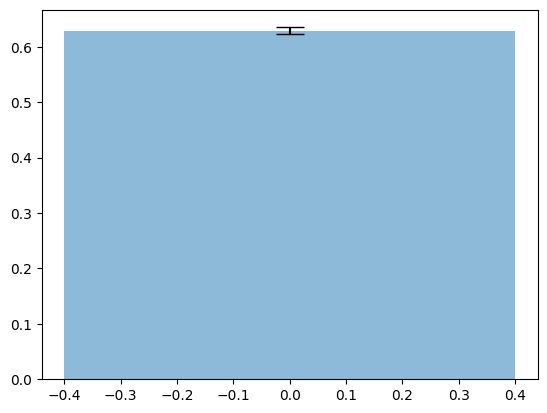

In [95]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x292f435c6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x292f435fe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x292f435f6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x292f5468820>],
 'fliers': [<matplotlib.lines.Line2D at 0x292f546bf10>],
 'means': []}

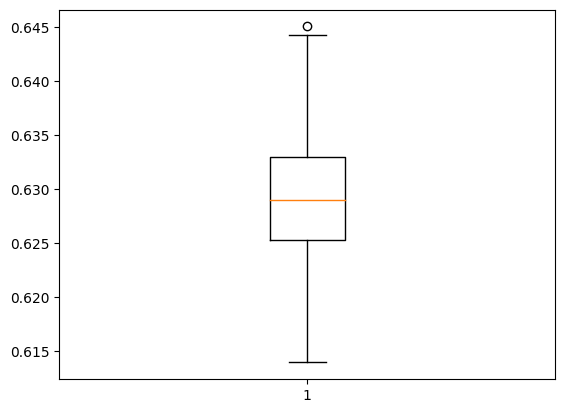

In [96]:
plt.boxplot(ri)

## Part II: Hierarchical Clustering


### Exercise 3: Compute the euclidean distance matrix using the pdist function from scipy.spatial.distance.

In [11]:
euc_distance_matrix = sc.spatial.distance.pdist(syn)
display(euc_distance_matrix)
euc_distance_matrix.shape

array([0.40188959, 0.70517822, 0.27497739, ..., 0.39938785, 0.88660075,
       0.76534229])

(4950,)

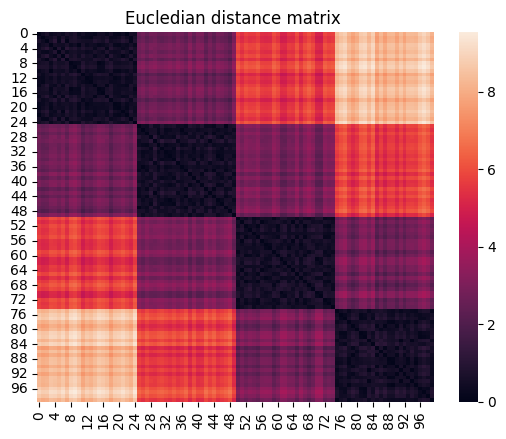

In [12]:
squareform = sc.spatial.distance.squareform(euc_distance_matrix)
plt.title("Eucledian distance matrix ")
sbn.heatmap(squareform)
plt.show()

In [13]:
l = sc.cluster.hierarchy.linkage(euc_distance_matrix)
l

array([[3.00000000e+00, 1.00000000e+01, 1.55761261e-02, 2.00000000e+00],
       [0.00000000e+00, 2.20000000e+01, 2.62441348e-02, 2.00000000e+00],
       [3.70000000e+01, 4.40000000e+01, 2.72950459e-02, 2.00000000e+00],
       [3.30000000e+01, 4.50000000e+01, 2.89611630e-02, 2.00000000e+00],
       [5.10000000e+01, 6.40000000e+01, 2.95042406e-02, 2.00000000e+00],
       [5.20000000e+01, 6.70000000e+01, 3.39144900e-02, 2.00000000e+00],
       [8.00000000e+00, 1.50000000e+01, 3.91599094e-02, 2.00000000e+00],
       [2.90000000e+01, 4.30000000e+01, 4.40581778e-02, 2.00000000e+00],
       [8.30000000e+01, 9.40000000e+01, 4.49295173e-02, 2.00000000e+00],
       [8.90000000e+01, 9.50000000e+01, 4.64090297e-02, 2.00000000e+00],
       [6.10000000e+01, 7.00000000e+01, 5.11832035e-02, 2.00000000e+00],
       [7.90000000e+01, 8.70000000e+01, 5.16831651e-02, 2.00000000e+00],
       [9.10000000e+01, 1.08000000e+02, 5.35090255e-02, 3.00000000e+00],
       [6.00000000e+00, 2.10000000e+01, 5.52294829e

### Exercise 4: Display the corresponding dendrogram using the dendrogram function from scipy.cluster.hierarchy.

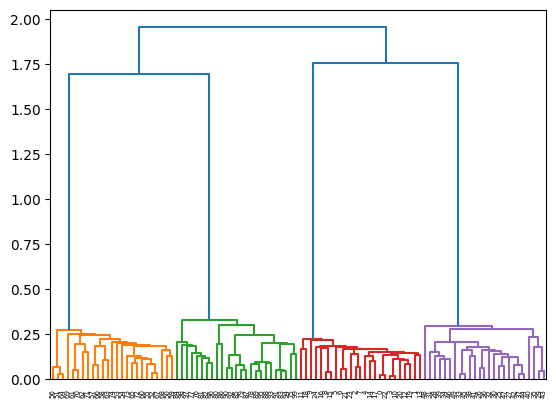

In [14]:
plt.figure()
dn = sc.cluster.hierarchy.dendrogram(l)

In [15]:
def agglomerativeClustering(x, k):
    d = sc.spatial.distance.pdist(x)
    l = sc.cluster.hierarchy.linkage(d)
    return sc.cluster.hierarchy.fcluster(l, k, criterion='maxclust')
agg = agglomerativeClustering(syn, 4)
agg

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

### Exercise 5: Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [16]:
ri = np.zeros((100))
for k in range(100):
    ri[k] = rand_index(synLabels, agg)
display(np.mean(ri),np.std(ri))

1.0

0.0

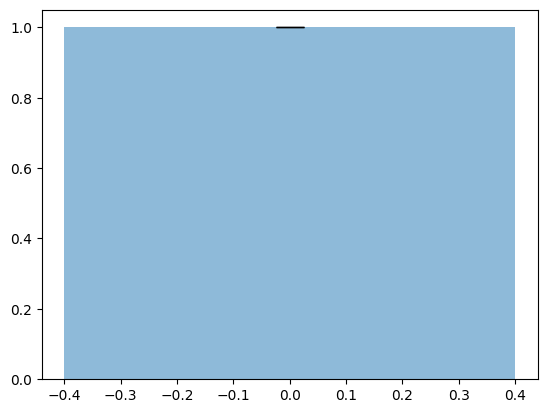

In [17]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x292f54959f0>,
 'caps': [<matplotlib.lines.Line2D at 0x292f5496230>,
 'boxes': [<matplotlib.lines.Line2D at 0x292f54942b0>],
 'medians': [<matplotlib.lines.Line2D at 0x292f54979d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x292f5497ca0>],
 'means': []}

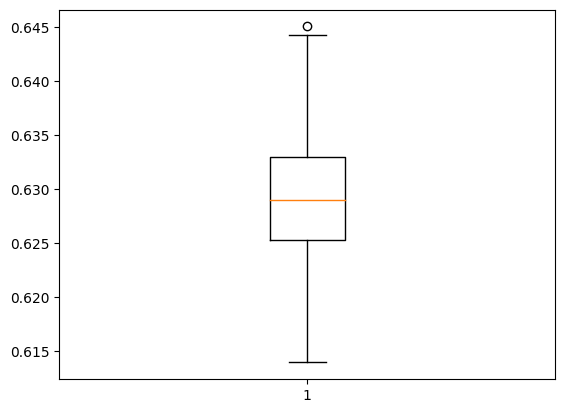

In [98]:
plt.boxplot(ri)

## Part III: Partitional Clustering - Kmeans

### Exercise6: Implement the k-means algorithm (see https://en.wikipedia.org/wiki/Kmeans_clustering section Standard algorithm for reference).

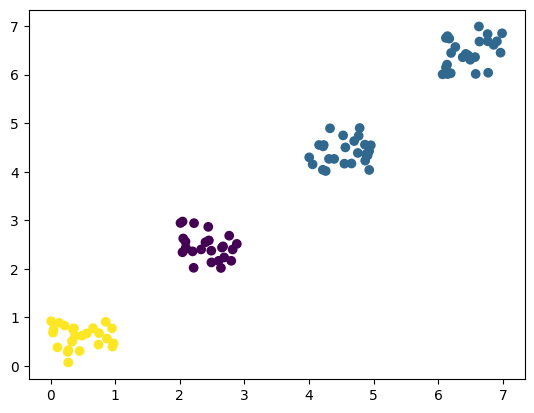

In [89]:
def kMeans(dataset, k, nbIterations=1000, show=False):
    centroids = np.random.random((k, dataset.shape[1]))*np.max(dataset)
    labels = np.zeros((dataset.shape[0]))
    for i in range(nbIterations):
        if show:
            plt.scatter(dataset[:, 0], dataset[:, 1], c=labels);
            plt.scatter(centroids[:, 0], centroids[:, 1], s=200);
            plt.show();
        cd = sc.spatial.distance.cdist(centroids, dataset)
        pastLabels = labels
        for d in range(dataset.shape[0]):
            labels[d] = np.argmin(cd[:, d])
        for c in range(k):
            centroids[c, :] = np.mean(dataset[labels==c, :], axis=0)
        if (np.all(pastLabels == labels)):
            break
    return labels
labels = kMeans(syn, 4)
plt.scatter(syn[:, 0], syn[:, 1], c=labels);
plt.show()

### Exercise7: Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [19]:
ri = np.zeros((100))
for k in range(100):
    ri[k] = rand_index(synLabels, kMeans(syn, 4))
display(np.mean(ri),np.std(ri))

0.7789131313131314

0.0939213050032685

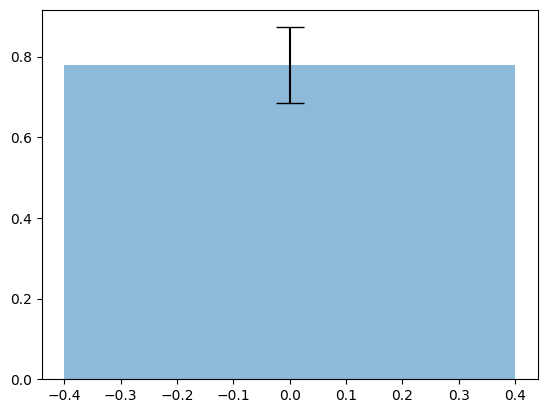

In [20]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

## Part IV: DBSCAN

### Exercise8 : Clustering the data syn by DBSCAN.

In [21]:
clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=5).fit(syn)
clustering_DBSCAN.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [90]:
ri = np.zeros((100))
for k in range(100):
    clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=5).fit(syn)
    ri[k] = rand_index(synLabels, clustering_DBSCAN.labels_)
display(np.mean(ri),np.std(ri))

1.0

0.0

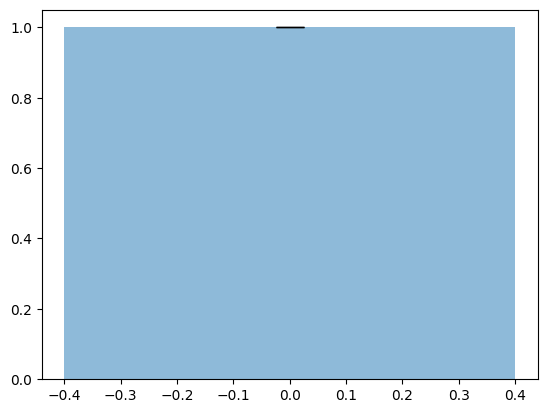

In [23]:
plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
plt.show()

### Exercise9 : Performance Analysis

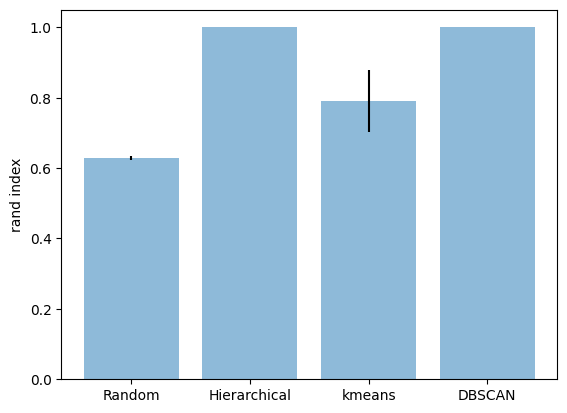

In [100]:
ri = np.zeros((4, 100))
for k in range(100):
    ri[0, k] = rand_index(synLabels, randomClustering(syn, 4))
    ri[1, k] = rand_index(synLabels, agglomerativeClustering(syn, 4))
    ri[2, k] = rand_index(synLabels, kMeans(syn, 4))
    ri[3, k] = rand_index(synLabels, DBSCAN(eps=0.5, min_samples=5).fit(syn).labels_)
x = [0, 1, 2, 3]
plt.bar(x, np.mean(ri, axis=1), yerr = np.std(ri, axis=1), alpha=0.5, ecolor='black')
plt.ylabel('rand index')
plt.xticks(x, ['Random', 'Hierarchical', 'kmeans', 'DBSCAN'])
plt.show()

### Exercise10: Load the iris dataset using the sklearn.datasets.load_iris function from scikit-learn and perform the same performance analysis using this dataset.